# PyTorch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from collections import defaultdict
from torch.distributions.categorical import Categorical
from functools import partial
from torch.optim import Adam

### Basic Functions

Functions to test
- T.flatten(x1, 1)
- .item() -> Returns the value of this tensor as a standard Python number. This only works for tensors with one element.
- T.concat((x1, x2), dim=1)
- T.cat([batch[i][2] for i in range(n)]).view(n, 1)
- new_logits.gather(1, actions)
- T.clip(ratios, 1 - margin, 1 + margin)
- @T.no_grad()

In [2]:
arr = np.random.randint(0, 10, (5, 1))
arr_pt = torch.from_numpy(arr)
margin = 3

# Print the array
print('array shape:', arr_pt.shape)
print('array:', arr_pt)
print('array[1]:', arr_pt[1])
print('array[1].item():', arr_pt[1].item())
print()

# view() reshapes the tensor without copying memory, similar to numpy's reshape()
print('view(5):', arr_pt.view(5))
print('view(1, 5):', arr_pt.view(1, 5))
print('view(5, 1):', arr_pt.view(5, 1))
print()

# Flatten the array -> applicable to multi dimensional arrays
print(torch.flatten(arr_pt, 0))
print()

# Clip function
print(f'clip: {1 - margin, 1 + margin}\n{torch.clip(arr_pt, 1 - margin, 1 + margin)}')

array shape: torch.Size([5, 1])
array: tensor([[9],
        [1],
        [9],
        [1],
        [3]], dtype=torch.int32)
array[1]: tensor([1], dtype=torch.int32)
array[1].item(): 1

view(5): tensor([9, 1, 9, 1, 3], dtype=torch.int32)
view(1, 5): tensor([[9, 1, 9, 1, 3]], dtype=torch.int32)
view(5, 1): tensor([[9],
        [1],
        [9],
        [1],
        [3]], dtype=torch.int32)

tensor([9, 1, 9, 1, 3], dtype=torch.int32)

clip: (-2, 4)
tensor([[4],
        [1],
        [4],
        [1],
        [3]], dtype=torch.int32)


In [5]:
# Flatten
arr_pt = torch.randint(0, 10, (4, 4))

# Print the array
print('array shape:', arr_pt.shape)
print('array:', arr_pt)
print('array[1]:', arr_pt[1])
print()

# view() reshapes the tensor without copying memory, similar to numpy's reshape()
print('view(5):', arr_pt.view(16))
print('view(1, 5):', arr_pt.view(1, 16))
print('view(5, 1):', arr_pt.view(16, 1))
print()

# Flatten the array -> applicable to multi dimensional arrays
print(torch.flatten(arr_pt, 0))
print(torch.flatten(arr_pt, 1))

array shape: torch.Size([4, 4])
array: tensor([[0, 6, 4, 5],
        [6, 2, 6, 0],
        [4, 2, 3, 8],
        [6, 7, 3, 4]])
array[1]: tensor([6, 2, 6, 0])

view(5): tensor([0, 6, 4, 5, 6, 2, 6, 0, 4, 2, 3, 8, 6, 7, 3, 4])
view(1, 5): tensor([[0, 6, 4, 5, 6, 2, 6, 0, 4, 2, 3, 8, 6, 7, 3, 4]])
view(5, 1): tensor([[0],
        [6],
        [4],
        [5],
        [6],
        [2],
        [6],
        [0],
        [4],
        [2],
        [3],
        [8],
        [6],
        [7],
        [3],
        [4]])

tensor([0, 6, 4, 5, 6, 2, 6, 0, 4, 2, 3, 8, 6, 7, 3, 4])
tensor([[0, 6, 4, 5],
        [6, 2, 6, 0],
        [4, 2, 3, 8],
        [6, 7, 3, 4]])


In [ ]:
memory = []
for i in range(3):
        arr = np.random.randint(0, 10, (3, 1))
        arr_pt = torch.from_numpy(arr)
        memory.append(arr_pt)

# Creating a new array with cat method using the second element of each array
memory_cat = torch.cat([x[1] for x in memory])
memory_cat_vw = torch.cat([x[1] for x in memory]).view(3, 1)

# Print memory arrays
[print(x) for x in memory]
print()
print(memory_cat, '\n')
print(memory_cat_vw)

tensor([[7],
        [1],
        [3]], dtype=torch.int32)
tensor([[7],
        [1],
        [7]], dtype=torch.int32)
tensor([[4],
        [4],
        [1]], dtype=torch.int32)

tensor([1, 1, 4], dtype=torch.int32) 

tensor([[1],
        [1],
        [4]], dtype=torch.int32)


In [ ]:
# Testing gather function
actions = torch.randint(5, (5, 1))
probs = torch.rand(5, 5)
gather_test = probs.gather(1, actions)

print(actions)
print(probs)
print(gather_test)

tensor([[4],
        [3],
        [4],
        [2],
        [0]])
tensor([[0.6078, 0.8323, 0.3560, 0.0376, 0.7533],
        [0.8106, 0.4298, 0.0742, 0.4327, 0.0456],
        [0.6012, 0.8980, 0.1531, 0.4349, 0.6543],
        [0.4689, 0.0735, 0.7088, 0.5862, 0.1632],
        [0.5960, 0.9476, 0.7934, 0.7507, 0.3064]])
tensor([[0.7533],
        [0.4327],
        [0.6543],
        [0.7088],
        [0.5960]])


#### Pytorch concat

In [ ]:
# Testing concat
print('Concat square tensors with the same shape')
arr1 = torch.randint(10, (3, 3))
arr2 = torch.randint(10, (3, 3))

print(arr1)
print(arr2)
print()
print(f'Concat dim=0: \n{torch.concat((arr1, arr2), dim=0)}')
print(f'Concat dim=1: \n{torch.concat((arr1, arr2), dim=1)}\n')

print('Concat tensors with different shapes')
arr1 = torch.randint(10, (4, 3))
arr2 = torch.randint(10, (3, 3))

print(arr1)
print(arr2)
print()
print(f'Concat dim=0: \n{torch.concat((arr1, arr2), dim=0)}')
print(f'Concat dim=1 (using view): \n{torch.concat((arr1.view(3, 4), arr2), dim=1)}\n')

Concat square tensors with the same shape
tensor([[1, 1, 2],
        [3, 1, 7],
        [5, 4, 4]])
tensor([[4, 9, 0],
        [3, 9, 0],
        [4, 3, 4]])

Concat dim=0: 
tensor([[1, 1, 2],
        [3, 1, 7],
        [5, 4, 4],
        [4, 9, 0],
        [3, 9, 0],
        [4, 3, 4]])
Concat dim=1: 
tensor([[1, 1, 2, 4, 9, 0],
        [3, 1, 7, 3, 9, 0],
        [5, 4, 4, 4, 3, 4]])

Concat tensors with different shapes
tensor([[3, 1, 3],
        [9, 6, 1],
        [4, 1, 4],
        [2, 9, 9]])
tensor([[8, 3, 6],
        [9, 6, 7],
        [9, 0, 5]])

Concat dim=0: 
tensor([[3, 1, 3],
        [9, 6, 1],
        [4, 1, 4],
        [2, 9, 9],
        [8, 3, 6],
        [9, 6, 7],
        [9, 0, 5]])
Concat dim=1 (using view): 
tensor([[3, 1, 3, 9, 8, 3, 6],
        [6, 1, 4, 1, 9, 6, 7],
        [4, 2, 9, 9, 9, 0, 5]])



In [ ]:
# Spftmax
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

print(input)
print(output)

print(output.sum(dim=1))

tensor([[ 0.5635, -0.1851,  0.4630],
        [-2.1659,  0.5167,  0.7641]])
tensor([[0.4206, 0.1990, 0.3804],
        [0.0291, 0.4257, 0.5452]])
tensor([1., 1.])


#### Simple linear regression example

In [ ]:
def data_generator(n=10):
    w1 = 1
    w2 = 2

    x = torch.randint(10, (n, 1), dtype=torch.float32)

    y = w1 + w2 * x + torch.randn((n, 1), dtype=torch.float32)

    return x, y

x, y = data_generator()

print(x.shape)
print(x, y)

torch.Size([10, 1])
tensor([[3.],
        [8.],
        [3.],
        [5.],
        [2.],
        [8.],
        [1.],
        [8.],
        [8.],
        [3.]]) tensor([[ 7.9551],
        [17.4092],
        [ 8.3963],
        [11.9480],
        [ 5.3690],
        [15.6795],
        [ 3.3452],
        [16.3815],
        [17.0166],
        [ 6.8921]])


epoch 1, loss 218.283203125
epoch 51, loss 135.5340576171875
epoch 101, loss 78.82185363769531
epoch 151, loss 42.983604431152344
epoch 201, loss 22.000343322753906
epoch 251, loss 10.713483810424805
epoch 301, loss 5.172562599182129
epoch 351, loss 2.6990091800689697
epoch 401, loss 1.6949329376220703
epoch 451, loss 1.3221454620361328
epoch 501, loss 1.1927944421768188
epoch 551, loss 1.1478227376937866
epoch 601, loss 1.129150152206421
epoch 651, loss 1.117835283279419
epoch 701, loss 1.1083611249923706
epoch 751, loss 1.0993118286132812
epoch 801, loss 1.0903819799423218
epoch 851, loss 1.0815378427505493
epoch 901, loss 1.072801947593689
epoch 951, loss 1.064204454421997


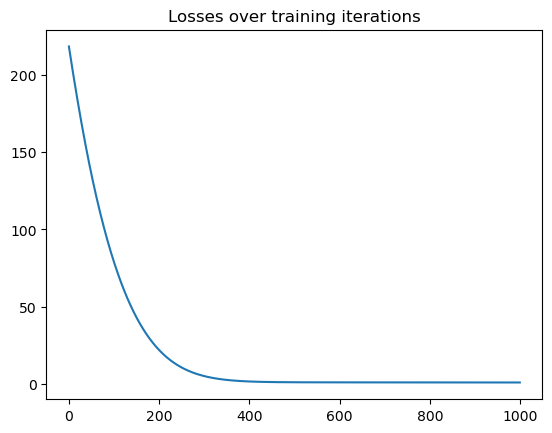

In [ ]:
class LinearRegression(torch.nn.Module):
    def __init__(self, 
                 input_n=1, 
                 output_n=1,
                 lr=0.01):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_n, output_n)
        self.optimizer = Adam(self.parameters(), lr=lr)

    def forward(self, x):
        out = self.linear(x)
        return out

    def train(self, x, y, epochs=1000):
        losses = []
        for i, epoch in enumerate(range(epochs)):
            epoch += 1

            # Clear gradients w.r.t. parameters
            self.optimizer.zero_grad() 

            # Forward to get output
            y_pred = self.forward(x_train)

            # Calculate Loss
            loss = torch.mean((y_train - y_pred)**2)

            losses.append(loss.detach().numpy())

            # Getting gradients w.r.t. parameters
            loss.backward()

            # Updating parameters
            self.optimizer.step()

            if i%50==0:
                print('epoch {}, loss {}'.format(epoch, loss.item()))

        return losses

# Create training data
x_train, y_train = data_generator()

lr = LinearRegression()
losses = lr.train(x_train, y_train)

# Plot losses
plt.title('Losses over training iterations')
plt.plot(losses)
plt.show()


#### Test nograd on model trained in previous section

In [ ]:
def inference(n=1000):
    x_train, y_train = data_generator(n=n)
    y_pred = lr(x_train)

@torch.no_grad()
def inference_nograd(n=1000):
    x_train, y_train = data_generator(n=n)
    y_pred = lr(x_train)

In [ ]:
%%timeit
inference()

146 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%%timeit
inference_nograd()

109 µs ± 4.25 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### Investigating how PyTorch accumulates gradients

In [ ]:
# create tensors with requires_grad = true
x = torch.tensor(2.0, requires_grad = True)

# print the tensor
print("x:", x)

# define a function y for the tensor, x
y = x**3 + 1
print("y:", y)

# First backward pass
# Compute gradients using backward function for y
y.backward(retain_graph=True)

# Access the gradients using x.grad
dx = x.grad
print("x.grad first pass:", dx)

# Second backward pass
y.backward(retain_graph=True)

# Access the gradients using x.grad
dx = x.grad
print("x.grad second pass:", dx)

# Third backward pass
y.backward()

# Access the gradients using x.grad
dx = x.grad
print("x.grad third pass:", dx)


x: tensor(2., requires_grad=True)
y: tensor(9., grad_fn=<AddBackward0>)
x.grad first pass: tensor(12.)
x.grad second pass: tensor(24.)
x.grad third pass: tensor(36.)


#### Pytorch random numbers vs Numpy then converting to Pytorch

In [ ]:
%%timeit
arr = np.random.randint(0, 10, (3, 3))
arr_pt = torch.from_numpy(arr)

26 µs ± 4.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%%timeit
arr_pt = torch.randint(10, (3, 3))

6.13 µs ± 320 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Pytorch - Understanding categorical distribution and probability ratio

In [ ]:
# Each row represents the action values taking 1 of 4 actions, as output from an actor network
nn_output = torch.tensor([[0.1, 0.9, 0.3, 0.1],
                          [0.9, 0.6, 0.3, 0.2]])
nn_output


tensor([[0.1000, 0.9000, 0.3000, 0.1000],
        [0.9000, 0.6000, 0.3000, 0.2000]])

In [ ]:
# These outputs are then fed through a softmax function to produce probabilities
sm = torch.softmax(nn_output, dim=1)
sm

tensor([[0.1836, 0.4086, 0.2242, 0.1836],
        [0.3589, 0.2659, 0.1970, 0.1782]])

In [ ]:
# Checking that the probs sum to 1
print(sm[0].sum())
print(sm[1].sum())

tensor(1.)
tensor(1.)


In [ ]:
# Sampling from the distribution
dist = Categorical(sm)
action = dist.sample()

action

tensor([2, 0])

In [ ]:
# Given actions actually taken what are the probabilities of these actions using the latest output from the ann
actions = torch.tensor([0, 1])

new_probs = dist.log_prob(actions)
new_probs

tensor([-1.6951, -1.3247])

In [ ]:
# Calculating the probability ratio
old_probs = torch.tensor([-1.6, -1.3])
prob_ratio = new_probs.exp() / old_probs.exp()
prob_ratio

tensor([1.0509, 1.0435])

### Understanding batched PPO dimensions

In [6]:
num_steps = 128
num_envs = 8
action_space = 4
device = 'cpu'

actions = torch.zeros((num_steps, num_envs) + (action_space,)).to(device)
print(actions.shape)

torch.Size([128, 8, 4])


In [8]:
b_actions = actions.reshape((-1,) + (action_space,))
print(b_actions.shape)

torch.Size([1024, 4])
